# Enem data 2018

- This notebook aims to analyse the data related to the national exame for enrolling the public univerties in Brazil, ENEM (Exame Nacional do Ensino Médio - *National exame for High School*).

- information about the meaning of each column is given in */microdados_enem2018/DICIONÁRIO/Dicionário_Microdados_Enem_2018.xlsx*

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


pd.options.display.float_format = "{:,.2f}".format

The data is huge. Therefore, we are going to analyze
the first 1000 rows, make the EDA onto them and preparing it
before doing it for the entire df.

In [58]:
df2018 = pd.read_csv('DADOS/MICRODADOS_ENEM_2018.csv',
                     nrows = 100000, sep = ';', encoding = 'ISO-8859-1')

In [59]:
df2018.head(10)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180008202043,2018,5300108,Brasília,53,DF,44.00,M,1.00,1,...,A,A,A,A,A,A,A,A,B,A
1,180007197856,2018,2111102,São João dos Patos,21,MA,23.00,F,0.00,3,...,A,B,A,A,B,A,A,A,A,A
2,180008517434,2018,3530607,Mogi das Cruzes,35,SP,23.00,F,0.00,1,...,A,B,A,A,B,B,B,B,A,A
3,180007661228,2018,2916401,Itapetinga,29,BA,26.00,F,0.00,3,...,A,B,B,A,C,A,B,B,A,A
4,180008787987,2018,2918100,Jeremoabo,29,BA,20.00,M,0.00,0,...,A,B,A,A,B,A,B,B,B,A
5,180007239581,2018,2507507,João Pessoa,25,PB,23.00,F,0.00,1,...,A,B,A,A,B,A,B,B,A,A
6,180007198225,2018,3171709,Virgínia,31,MG,35.00,F,0.00,1,...,A,C,A,A,B,A,B,B,A,A
7,180008090447,2018,2207702,Parnaíba,22,PI,39.00,M,1.00,3,...,A,C,B,A,B,A,B,B,A,A
8,180008257068,2018,2304400,Fortaleza,23,CE,19.00,M,0.00,3,...,A,B,B,A,B,A,A,A,B,A
9,180008202044,2018,5103403,Cuiabá,51,MT,25.00,F,0.00,3,...,A,B,A,A,B,A,A,A,A,A


In [6]:
## All the columns that we have ##

## The information given by each column can be found in 'DICIONÁRIO DE VARIÁVEIS - ENEM 2018' ##

df2018.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

There are several columns which do not contribute for a first
analysis of the dataset. Let's drop out some of them right below
to clean it up a bit and let's take a closer look on it. These
columns can be picked up later from the original dataframe.

Most of the columns dropped at first are those related to enrollment
number, questions, type of the test, location of the test, etc...

In [7]:
columns_to_be_dropped = ['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
                         'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007',
                         'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
                         'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021',
                         'Q022', 'Q023', 'Q024', 'Q025', 'Q026', 'Q027',
                         'CO_MUNICIPIO_PROVA','NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
                         'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
                         'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
                         'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH', 
                         'TX_GABARITO_LC','TX_GABARITO_MT', 'TP_STATUS_REDACAO',
                         'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
                         'NU_NOTA_COMP5', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
                         'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA', 'IN_DEFICIENCIA_FISICA',
                         'IN_DEFICIENCIA_MENTAL', 'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA',
                         'IN_DISCALCULIA', 'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF',
                         'IN_GESTANTE', 'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
                         'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24', 'IN_AMPLIADA_18',
                         'IN_LEDOR', 'IN_ACESSO', 'IN_TRANSCRICAO', 'IN_LIBRAS','IN_LEITURA_LABIAL',
                         'IN_MESA_CADEIRA_RODAS', 'IN_MESA_CADEIRA_SEPARADA', 'IN_APOIO_PERNA',
                         'IN_GUIA_INTERPRETE', 'IN_COMPUTADOR', 'IN_CADEIRA_ESPECIAL', 'IN_CADEIRA_CANHOTO',
                         'IN_CADEIRA_ACOLCHOADA', 'IN_PROVA_DEITADO', 'IN_MOBILIARIO_OBESO',
                         'IN_LAMINA_OVERLAY', 'IN_PROTETOR_AURICULAR', 'IN_MEDIDOR_GLICOSE',
                         'IN_MAQUINA_BRAILE', 'IN_SOROBAN', 'IN_MARCA_PASSO', 'IN_SONDA',
                         'IN_MEDICAMENTOS', 'IN_SALA_INDIVIDUAL', 'IN_SALA_ESPECIAL',
                         'IN_SALA_ACOMPANHANTE', 'IN_MOBILIARIO_ESPECIFICO',
                         'IN_MATERIAL_ESPECIFICO', 'IN_NOME_SOCIAL'
                        ]

df2018_new = df2018.copy().drop(columns = columns_to_be_dropped)

In [8]:
## Checking that it worked ##

print (len(df2018_new))

df2018_new.head()

100000


,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,...,TP_SIT_FUNC_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,Brasília,53,DF,44.00,M,1.00,1,0,nan,NaN,...,1.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan
1,São João dos Patos,21,MA,23.00,F,0.00,3,1,"2,111,102.00",São João dos Patos,...,nan,1.00,1.00,1.00,1.00,521.00,568.70,513.10,480.30,280.00
2,Mogi das Cruzes,35,SP,23.00,F,0.00,1,1,"4,209,300.00",Lages,...,nan,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan
3,Itapetinga,29,BA,26.00,F,0.00,3,2,nan,NaN,...,nan,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan
4,Jeremoabo,29,BA,20.00,M,0.00,0,1,"2,800,308.00",Aracaju,...,1.00,0.00,1.00,1.00,0.00,nan,419.90,345.80,nan,360.00


In [9]:
## The remaining columns are the following 

df2018_new.columns.values

array(['NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'NU_NOTA_REDACAO'], dtype=object)

In [10]:
## Playing a bit with the dataset

## We can check the 10 youngest and 10 oldest people in this sample by doing

df2018_new.sort_values(by = ['NU_IDADE']).head(10)

,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,...,TP_SIT_FUNC_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
66258,Butiá,43,RS,12.00,F,0.00,1,1,"4,302,709.00",Butiá,...,nan,0.00,1.00,1.00,0.00,nan,462.80,490.40,nan,600.00
30193,Monte Santo de Minas,31,MG,13.00,F,0.00,3,1,"3,143,203.00",Monte Santo de Minas,...,nan,1.00,1.00,1.00,1.00,492.70,456.30,501.40,464.00,840.00
65245,Itamonte,31,MG,14.00,F,0.00,1,1,"3,133,006.00",Itamonte,...,nan,1.00,1.00,1.00,1.00,441.30,587.70,505.90,579.10,340.00
66069,Dourados,50,MS,14.00,M,0.00,1,1,"5,003,702.00",Dourados,...,nan,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan
35739,Jaú,35,SP,14.00,F,0.00,1,1,"3,525,300.00",Jaú,...,nan,1.00,1.00,1.00,1.00,534.80,633.80,516.80,516.20,420.00
43508,Nova Iguaçu,33,RJ,14.00,M,0.00,2,1,"3,304,557.00",Rio de Janeiro,...,nan,1.00,1.00,1.00,1.00,492.00,661.10,594.30,520.20,600.00
98130,Uberlândia,31,MG,14.00,F,0.00,1,1,"3,170,206.00",Uberlândia,...,nan,1.00,1.00,1.00,1.00,542.40,631.20,582.10,638.50,480.00
69323,Igarassu,26,PE,14.00,F,0.00,3,1,"2,609,600.00",Olinda,...,nan,1.00,1.00,1.00,1.00,366.70,540.20,457.60,586.80,580.00
18162,Maceió,27,AL,14.00,M,0.00,2,1,"2,704,302.00",Maceió,...,nan,1.00,1.00,1.00,1.00,488.90,419.30,422.70,435.30,280.00
71969,Porto Velho,11,RO,14.00,M,0.00,1,1,"1,302,603.00",Manaus,...,nan,1.00,1.00,1.00,1.00,402.50,634.10,597.50,694.90,320.00


In [11]:
df2018_new.sort_values(by = ['NU_IDADE'], ascending = False).head(10)

,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,...,TP_SIT_FUNC_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
64523,Goiânia,52,GO,86.00,M,1.00,1,1,"3,166,808.00",Serra do Salitre,...,nan,1.00,1.00,1.00,1.00,443.30,603.10,577.90,396.50,440.00
25792,Natal,24,RN,78.00,M,1.00,1,1,"2,408,102.00",Natal,...,nan,1.00,1.00,1.00,1.00,497.60,667.70,560.40,662.40,660.00
87137,Rio de Janeiro,33,RJ,76.00,F,3.00,2,1,"3,304,557.00",Rio de Janeiro,...,nan,1.00,1.00,1.00,1.00,434.70,461.50,398.70,393.30,0.00
32016,Fortaleza,23,CE,76.00,F,1.00,1,1,"2,304,400.00",Fortaleza,...,nan,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan
91504,Duque de Caxias,33,RJ,73.00,M,1.00,1,1,"3,142,106.00",Miradouro,...,nan,1.00,1.00,1.00,1.00,479.80,467.30,528.20,400.80,480.00
93974,São Paulo,35,SP,72.00,M,1.00,1,3,nan,NaN,...,nan,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan
95613,Fortaleza,23,CE,70.00,M,1.00,3,1,"2,304,400.00",Fortaleza,...,nan,1.00,1.00,1.00,1.00,524.90,621.60,410.50,480.70,220.00
38655,Santa Cruz do Sul,43,RS,70.00,M,2.00,1,1,"4,217,600.00",Siderópolis,...,nan,1.00,1.00,1.00,1.00,449.50,594.70,469.60,529.60,560.00
79832,Salvador,29,BA,70.00,M,0.00,5,1,"2,927,408.00",Salvador,...,nan,1.00,1.00,1.00,1.00,545.80,639.40,505.80,547.90,400.00
90140,Natal,24,RN,70.00,M,1.00,1,3,nan,NaN,...,nan,1.00,1.00,1.00,1.00,596.10,622.90,573.20,659.90,520.00


This information is quite interesting. Indeed, despite of having
very young people trying to get into the University (like 14 yo,
the youngest being 12 yo), probably a good part of it is doing
it for training. However, there is a good amount (and this is
only a sample) people older than 70 years old doing ENEM and
they have no reason for doing so if not trying to get into
the University!

Let's analyze the distribution of ages per state.

In [12]:
df2018_new_bystate = df2018_new.groupby('SG_UF_RESIDENCIA')

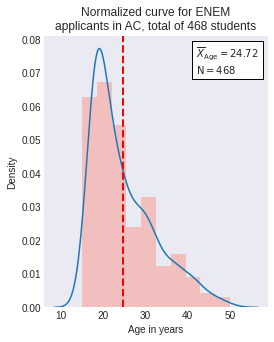

In [20]:
from matplotlib.offsetbox import AnchoredText

plt.style.use('seaborn-dark')

## TEST HISTOGRAM FOR THE ENTIRE COUNTRY BELOW ##

for state, dataframe in df2018_new_bystate:
    fig, ax = plt.subplots(figsize = (4,5))
    n_students = len(dataframe)
    mean = dataframe.NU_IDADE.mean()
    median = dataframe.NU_IDADE.median()
    std = dataframe.NU_IDADE.std()
    
    sns.distplot(dataframe['NU_IDADE'], bins = 10, hist_kws={'color' : 'salmon'})
    ax.axvline(mean, color='r', linestyle='dashed', linewidth=2)
    
    ax.set_xlabel('Age in years')
    ax.set_title('Normalized curve for ENEM\napplicants in %s, total of %s students' %(state, n_students))
    
    info = '\n'.join((
    r'$\overline{X}_\mathrm{Age}=%.2f$' % (mean, ),
    r'$\mathrm{N}=%.0f$' % (n_students, )))
    
    anchored_text = AnchoredText(info, loc=1)
    ax.add_artist(anchored_text)

    break

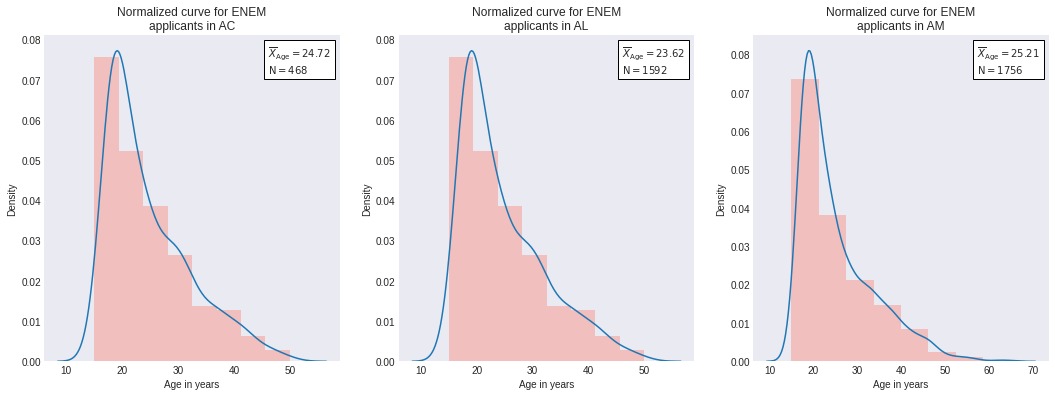

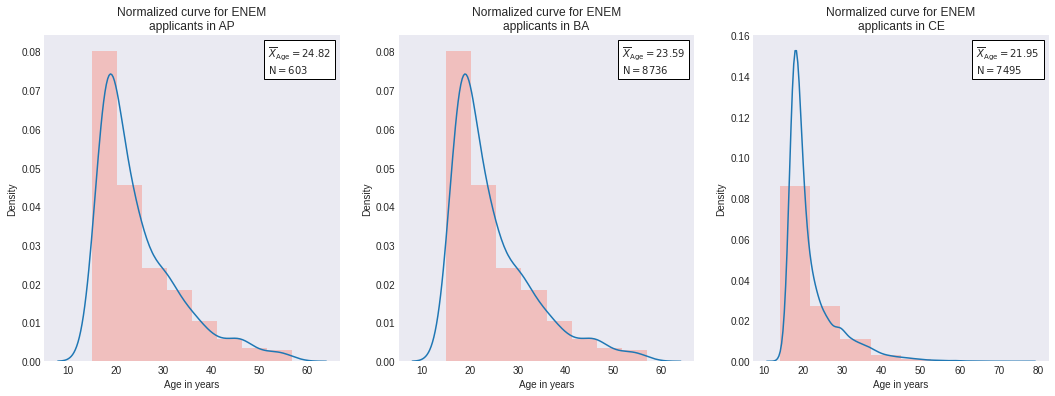

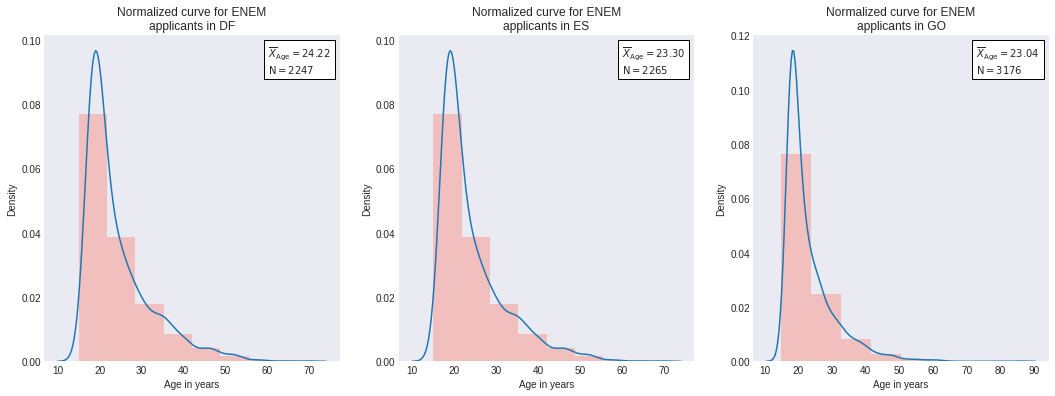

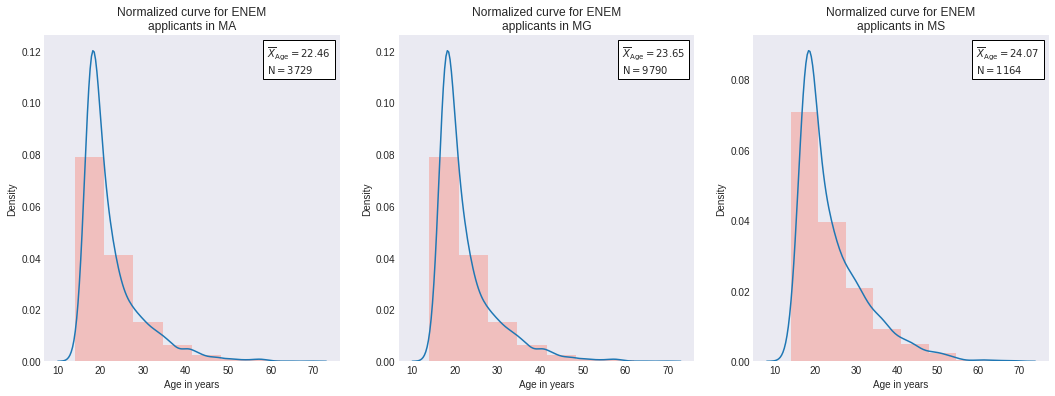

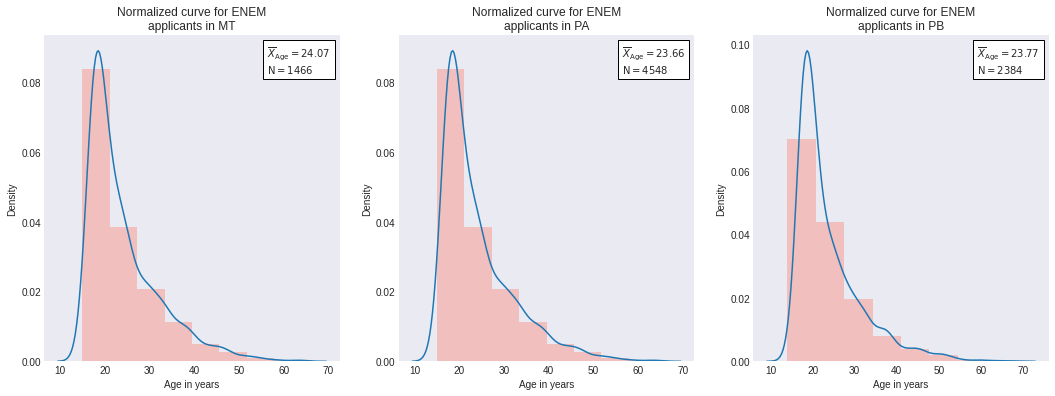

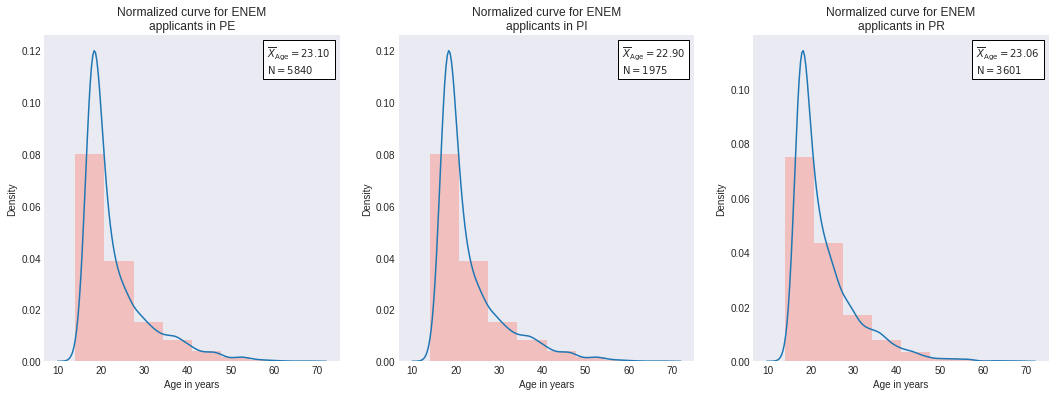

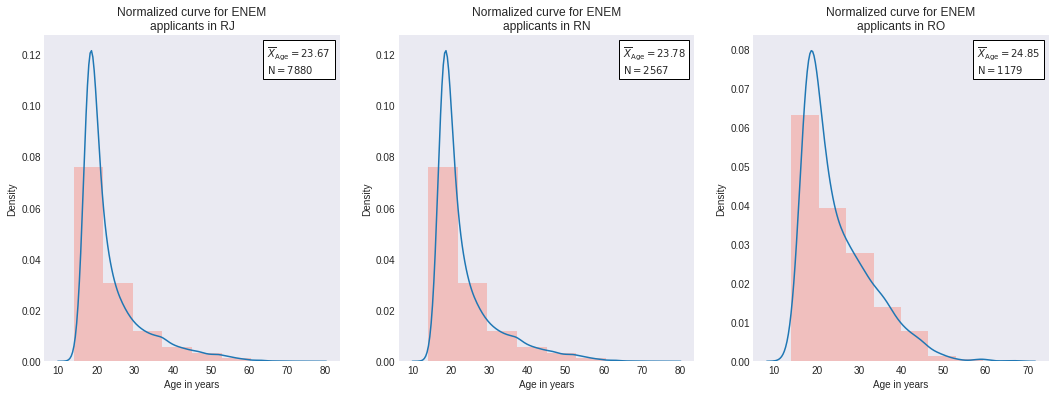

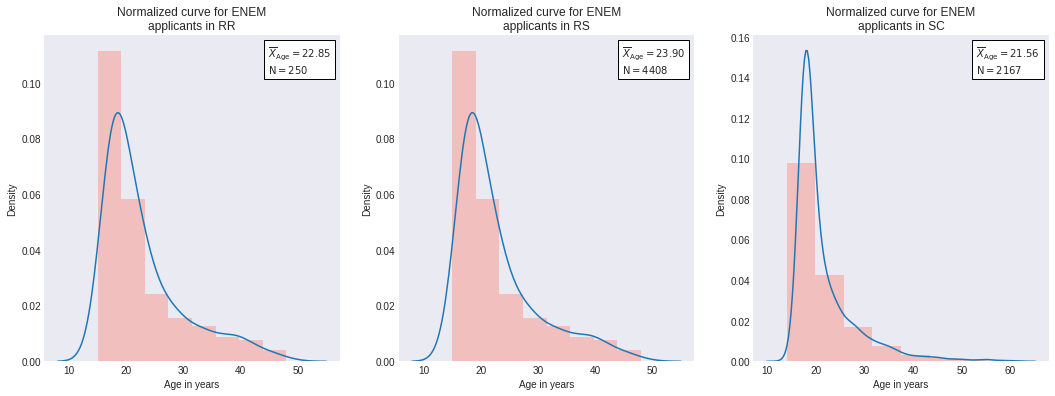

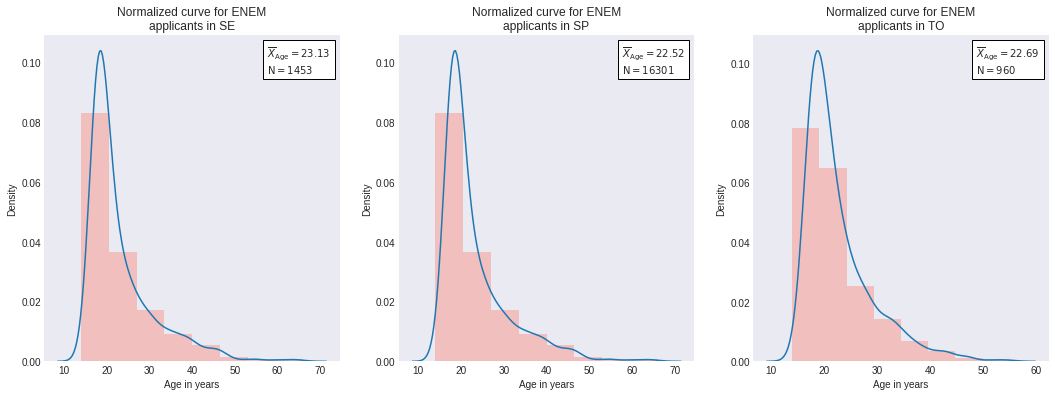

In [21]:
states = pd.Series(df2018.copy().
                   SG_UF_RESIDENCIA
                   .unique()).sort_values().reset_index(drop = True)

## Since we have 27 states, let's split them into three columns and 9 rows.
## To do so, let's loop over three axes each time

for i in range(int(len(states)/3)):
    fig, ax = plt.subplots(1, 3, figsize = (18,6))
    
    # Creating the first histogram of the ith row
    data0 = df2018_new_bystate.get_group(states[3*i]).NU_IDADE
    n_students = len(data0)
    mean = data0.mean()
    std = data0.std()
    
    ## BOX WITH STATISTICAL INFORMATION 
    info = '\n'.join((
    r'$\overline{X}_\mathrm{Age}=%.2f$' % (mean, ),
    r'$\mathrm{N}=%.0f$' % (n_students, )))
    
    ## ADDIND THE ARTIST
    anchored_text = AnchoredText(info, loc=1)
    ax[0].add_artist(anchored_text)
    
    ## PLOTTING THE HISTOGRAM
    sns.distplot(data0, ax = ax[0], bins = 8, hist_kws={'color' : 'salmon'})
    ax[0].set_xlabel('Age in years')
    ax[0].set_title('Normalized curve for ENEM\napplicants in %s'%states[3*i])
    
    # Creating the second histogram of the ith row
    data1 = df2018_new_bystate.get_group(states[3*i+1]).NU_IDADE
    n_students = len(data1)
    mean = data1.mean()
    std = data1.std()
    
    ## BOX WITH STATISTICAL INFORMATION     
    info = '\n'.join((
    r'$\overline{X}_\mathrm{Age}=%.2f$' % (mean, ),
    r'$\mathrm{N}=%.0f$' % (n_students, )))
    
    ## ADDIND THE ARTIST
    anchored_text = AnchoredText(info, loc=1)
    ax[1].add_artist(anchored_text)
    
    ## PLOTTING THE HISTOGRAM
    sns.distplot(data0, ax = ax[1], bins = 8, hist_kws={'color' : 'salmon'})
    ax[1].set_xlabel('Age in years')
    ax[1].set_title('Normalized curve for ENEM\napplicants in %s'%states[3*i+1])
    
    # Creating the third histogram of the ith row
    data2 = df2018_new_bystate.get_group(states[3*i+2]).NU_IDADE
    n_students = len(data2)
    mean = data2.mean()
    std = data2.std()
    
    ## BOX WITH STATISTICAL INFORMATION     
    info = '\n'.join((
    r'$\overline{X}_\mathrm{Age}=%.2f$' % (mean, ),
    r'$\mathrm{N}=%.0f$' % (n_students, )))
    
    ## ADDIND THE ARTIST
    anchored_text = AnchoredText(info, loc=1)
    ax[2].add_artist(anchored_text)
    
    ## PLOTTING THE HISTOGRAM
    sns.distplot(data2, ax = ax[2], bins = 8, hist_kws={'color' : 'salmon'})
    ax[2].set_xlabel('Age in years')
    ax[2].set_title('Normalized curve for ENEM\napplicants in %s'%states[3*i+2])

By this sample of $N=100.000$ people, we can analyze few interesting points:
one of them, already expected, is that all of them are right-skewer distributions.
That is expected since most people try to get into the university at the beginning
of their adult lives, between 15-25 years old. It is interesting noting that there
are people, older than 30-40 years old which are still trying. By the histograms
we can see that it is a general trend observed througout all the states.

In [22]:
df_age_state = df2018_new[['NU_IDADE', 'SG_UF_RESIDENCIA']].copy()

df_age_state.sort_values(by = ['NU_IDADE'], ascending = False).head(10)

,NU_IDADE,SG_UF_RESIDENCIA
64523,86.00,GO
25792,78.00,RN
87137,76.00,RJ
32016,76.00,CE
91504,73.00,RJ
93974,72.00,SP
95613,70.00,CE
38655,70.00,RS
79832,70.00,BA
90140,70.00,RN


In [23]:
## Let's analyse the distribution of number of students per state and older people,
## say, older than 30 still trying ENEM ##

df_age_state_gb = df_age_state.groupby('SG_UF_RESIDENCIA')

df_age_state_count = pd.DataFrame(columns = ['State', 'Number_applicants', 'Older_than_30'])

for state, dataframe in df_age_state_gb:
    total = len(dataframe)
    older_30 = len(dataframe[dataframe['NU_IDADE'] >= 30])
    
    df_age_state_count = df_age_state_count.append({'State': state,
                                                    'Number_applicants': total,
                                                    'Older_than_30': older_30}, ignore_index = True)

In [24]:
# Let's sort it by the number ot total applicants

df_age_state_count.sort_values(by = 'Number_applicants', ascending = False, inplace = True)
df_age_state_count.reset_index(inplace = True)
df_age_state_count.drop('index', axis = 1, inplace = True)

In [33]:
df_age_state_count.head()

,State,Number_applicants,Older_than_30
0,SP,16301,2305
1,MG,9790,1653
2,BA,8736,1521
3,RJ,7880,1378
4,CE,7495,918


In [25]:
percentage = 100*df_age_state_count.Older_than_30/df_age_state_count.Number_applicants

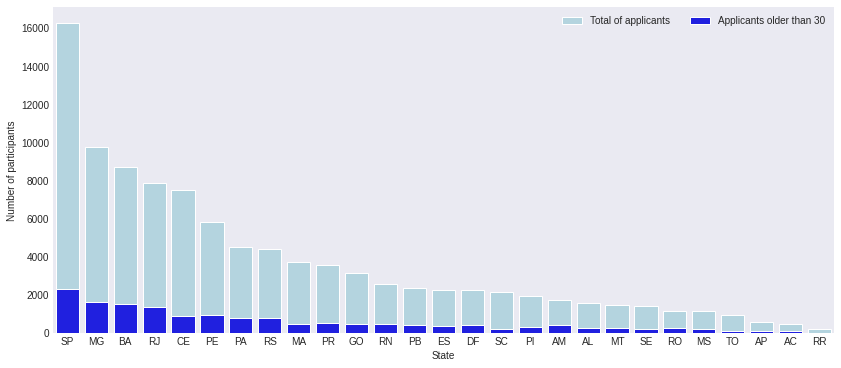

In [26]:
fig, ax = plt.subplots(figsize = (14,6))

sns.barplot(x = df_age_state_count.State,
            y = df_age_state_count.Number_applicants,
            color = 'lightblue', edgecolor = 'w',
           label = 'Total of applicants')

bar_plot_older = sns.barplot(x = df_age_state_count.State,
            y = df_age_state_count.Older_than_30,
            color = 'blue', edgecolor = 'w',
           label = 'Applicants older than 30')

ax.set_ylabel('Number of participants')
ax.legend(ncol = 2, loc = 'upper right')


plt.show()

Now we can make an analysis regarding the grades of the applicants per gender.
For doing so, we need to keep the columns [NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC,NU_NOTA_MT],
which hold for natural science, human science, communication (including Porguese and Foreign Language)
and Math, respectively. The chosen foreign Language is in [TP_LINGUA] (0 for English
and 1 for Spanish). The essay is given in [NU_NOTA_REDACAO].

The gender is indicated in [TP_SEXO]

In [27]:
df_gender = df2018.copy()[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'TP_SEXO']]

In [28]:
# Let's take a look on the data

df_gender.head(10)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_SEXO
0,nan,nan,nan,nan,nan,M
1,521.00,568.70,513.10,480.30,280.00,F
2,nan,nan,nan,nan,nan,F
3,nan,nan,nan,nan,nan,F
4,nan,419.90,345.80,nan,360.00,M
5,461.80,564.00,466.80,538.80,580.00,F
6,nan,nan,nan,nan,nan,F
7,499.30,663.20,605.20,733.80,680.00,M
8,411.80,429.80,445.20,459.00,340.00,M
9,469.40,650.20,606.60,525.40,740.00,F


There are a good amount of people which seem to not have done some of the
tests (simply given it in blank or missed the test due to some reason).
An interesting point to be addressed is that the essay test corresponds
to a big amount of the grade assigned to the applicant. Let's check how
many students have got essentially zero in the essay test.

In [29]:
df_gender.isna().sum()

NU_NOTA_CN         26949
NU_NOTA_CH         22688
NU_NOTA_LC         22688
NU_NOTA_MT         26949
NU_NOTA_REDACAO    22688
TP_SEXO                0
dtype: int64

In [30]:
## 22,7% of the students got zero (for missing the test day or handling it in blank)!!
df_gender.NU_NOTA_REDACAO[df_gender.NU_NOTA_REDACAO == 0].count()

1479

Despite of being a small number, 1479 people got grade zero in the essay test,
22688 handled it in blank or didn't make it on time for the test), it adds
up to 24167 of people which dind't grade in it! It is basically 1/4 of the applicants!

Now let's analyze the grade distribution per gender, as we motivated previously.
As the essay grade is more relevant for several reasons, for example, if you
got a zero in it (or if it has a NaN value), you won't be able to participate
in several undergraduate supporting programs  offered by the Brazilian government.

Therefore, we are going to delete from the list those applicants 
which didn't scored in it.

In [31]:
#Firstly, let's convert the string "nan" into a np.NaN

def converter(element):
    if element == 'nan':
        return np.NaN
    return element

df_gender = df_gender.applymap(converter)

df_gender = df_gender[df_gender.NU_NOTA_REDACAO.notna() & df_gender.NU_NOTA_REDACAO != 0]

print (len(df_gender))

75833


In [32]:
gender_gb = df_gender.groupby('TP_SEXO')

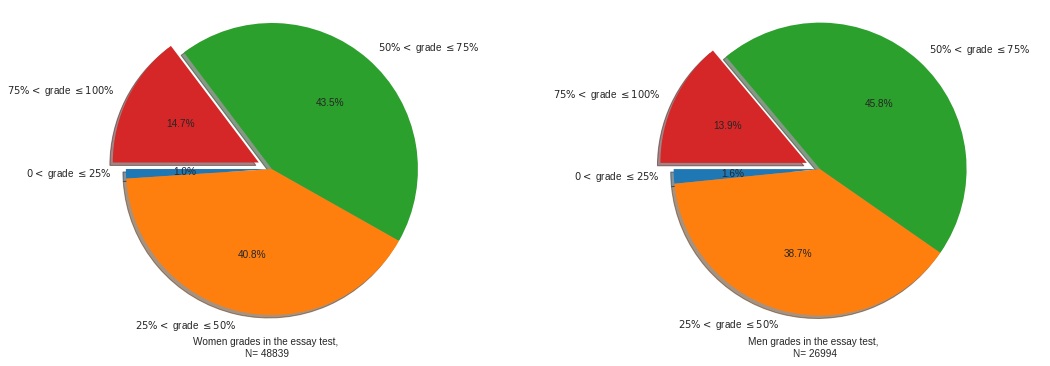

In [33]:
gender_dict = {'F': 'Women', 'M': 'Men'}

fig, ax = plt.subplots(1, 2, figsize = (18,6))

i = 0 
for gender, dataframe in gender_gb:
    grade = dataframe.NU_NOTA_REDACAO
    gender_name = gender_dict[gender]
    
    grade_0_25 = len(dataframe[(0 < grade) & (grade <= 250)])
    grade_25_50 = len(dataframe[(250 < grade) & (grade <= 500)])
    grade_50_75 = len(dataframe[(500 < grade) & (grade <= 750)])
    grade_75_100 = len(dataframe[(750 < grade) & (grade <= 1000)])
    
    sizes = [grade_0_25, grade_25_50, grade_50_75, grade_75_100]
    score = '$0 <$ grade $\leq 25\%$', '$25\% <$ grade $\leq 50\%$', '$50\% <$ grade $\leq 75\%$', '$75\% <$ grade $\leq 100\%$'
    
    ax[i].pie(sizes, explode = (0, 0, 0, 0.1), labels = score, autopct='%1.1f%%',shadow=True, startangle=180)
    ax[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax[i].set_xlabel('%s grades in the essay test, \nN= %s'% (gender_name, len(dataframe)) )
    i += 1
    

From the analysis above we observe that there are almost as twice as women
doing the text compared to men. We observe that, percentage-wise, women
are doing slightly better than the men group when analyzing the highest
score group. There are a little less than one percent of women within
the group which scored $75%$ or higher in the test. When one compares
the lower side, only $1%$ of women scored less than $25%$
whereas within the men group $1.6%$ scored less than $25%$. In the bulk
of the distribution, we observe that they are also pretty similar. It leads
us to the conclusion that gender is not a determinant factor for those which
write well or not. 

We can also make an histogram of the grade of the same people, by group, in
each of the the studying fields, science, math, etc... For doing so, let's
make two histograms on top of each other (for girls (blue) and boys (pink)),
for each of subject.

In [34]:
df_gender.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_SEXO
1,521.00,568.70,513.10,480.30,280.00,F
4,nan,419.90,345.80,nan,360.00,M
5,461.80,564.00,466.80,538.80,580.00,F
7,499.30,663.20,605.20,733.80,680.00,M
8,411.80,429.80,445.20,459.00,340.00,M


NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC,NU_NOTA_MT] stands for natural science, human science, communication (including Porguese and Foreign Language) and Math, respectively. The chosen foreign Language is in [TP_LINGUA] (0 for English and 1 for Spanish). The essay is given in [NU_NOTA_REDACAO].

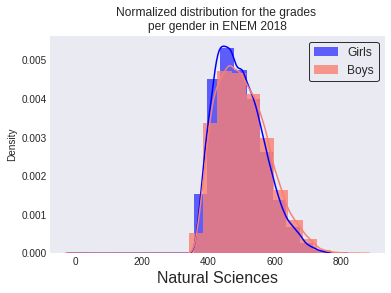

In [35]:
dict_subject = {'NU_NOTA_CN' : 'Natural Sciences', 'NU_NOTA_CH' : 'Human Sciences',
                'NU_NOTA_LC' : 'Language and communications',
                'NU_NOTA_MT' : 'Mathematics'}
dict_gender = {'F' : 'Girls', 'M' : 'Boys'}

## TEST FOR THE GENDER DISTRIBUTION

test_df = df_gender[['NU_NOTA_CN', 'TP_SEXO']].copy()

fig, ax = plt.subplots()
    

sns.distplot(test_df[test_df['TP_SEXO'] == 'F'].NU_NOTA_CN,
            bins = 20, color = 'b', hist_kws = {'alpha' : 0.6},
            label = 'Girls'
            )


sns.distplot(test_df[test_df['TP_SEXO'] == 'M'].NU_NOTA_CN,
            bins = 20, color = 'salmon', hist_kws = {'alpha' : 0.8},
            label = 'Boys'
            )

ax.set_xlabel(dict_subject['NU_NOTA_CN'], fontsize = 16)
ax.legend(frameon=True, fontsize = 12).get_frame().set_edgecolor('black')
ax.set_title('Normalized distribution for the grades \nper gender in ENEM 2018')

plt.show()

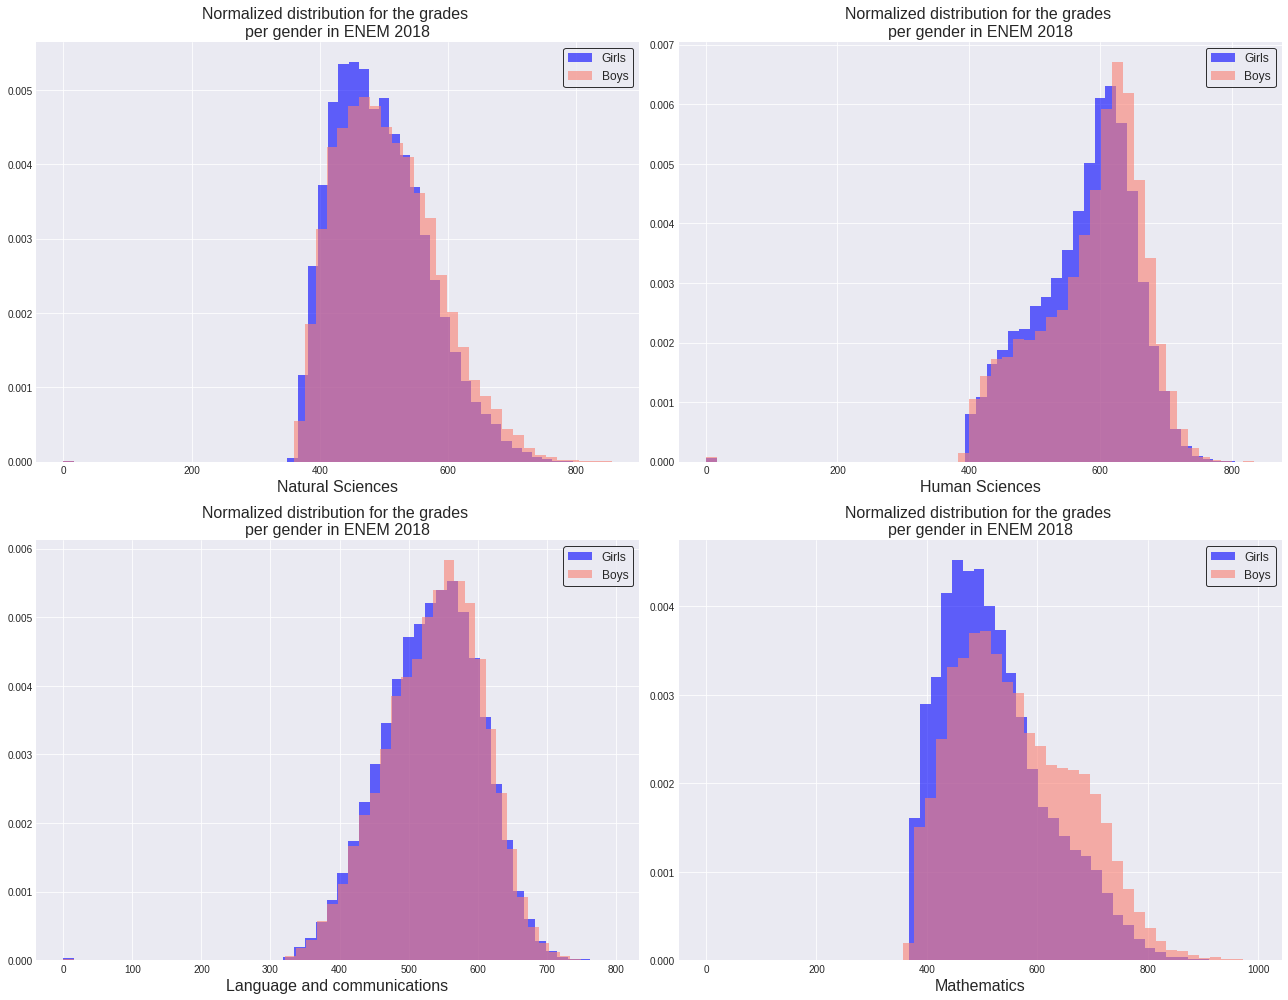

In [36]:
fig, ax = plt.subplots(2,2, figsize = (18,14))


def plot_function(subject,axs):
    
    
    data_girls = df_gender[[subject, 'TP_SEXO']].copy().groupby('TP_SEXO').get_group('F')[subject]
    data_boys = df_gender[[subject, 'TP_SEXO']].copy().groupby('TP_SEXO').get_group('M')[subject]
    
    axs.hist(data_girls, bins = 50, color = 'blue', density = True, alpha = 0.6, label = 'Girls')
    axs.hist(data_boys, bins = 50, color = 'salmon', density = True, alpha = 0.6, label = 'Boys')
    axs.legend(frameon=True, fontsize = 12).get_frame().set_edgecolor('black')
    axs.set_title('Normalized distribution for the grades \nper gender in ENEM 2018', fontsize = 16)
    
    axs.grid()
    axs.set_xlabel(dict_subject[subject], fontsize = 16)
    
    
#NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC,NU_NOTA_MT

plot_function('NU_NOTA_CN', ax[0, 0])
plot_function('NU_NOTA_CH', ax[0, 1])
plot_function('NU_NOTA_LC', ax[1, 0])
plot_function('NU_NOTA_MT', ax[1, 1])

fig.tight_layout()

plt.show()

In the histograms ploted above we have used a normalized distribution since we already
know that there are as twice as women when compared to men. There are a couple of points
which caught our eyes. At first glance it is quite amazing how they follow the same trend,
**even** when one has a more peculiar shape, like in *human sciences*.

Taking an individual analysis on each subject: we observe that for natural sciences
the pick (the mode) of the distribution is bigger for women than for the men, telling us
that there are more women concentrated around the mode. When one goes towards the upper part of the
histogram it tells us that, **percentage-wise**, there are more men than women (do not
forget that as a whole there are more women than men).

When one considers *human sciences*, it is clearly a left-skwed distribution. It is very interesting
observing that even the trend (the shape of the histogram) for men and women are essentially
the same. Since it is skewed to the left, it tells that the bulk of the distribution is concentrated
on the left and, consequently the mean of it is on the left of the mode.

For *language and communication* there is not much to say, the histograms (for men and women)
are very similar as well and it is slightly skewed, but it could be a statistical fluctuation.

For *Math* things changed a bit. We again have a skewed distribution and for both (men and women)
the mode is around 500 points, telling us that the bigger concentration of people scored around
500 points. However, the average of the grades for men are further to the right (note the
"pronounced belly" of the curve for men). That shows that in math men are doing slightly better
than women in this sample of the population, average-wise.

- As we could have already expected that there would be essentially no difference between them, since we expect the gender to play no role in the difference between the grades of women and men. However, it is quite fascinating that the trend followed by the histograms for men and women are the same in each subject (even in those which acquired a different shape, like for human sciences)!



Now we are going to make an analysis of something which will probably play a very important role:
the social status of each applicant, for example, from which kind of school they come from,
if they have had access to preparatory courses, etc... As previously, there are a lot of interesting
information that we can take from it concerning the social status of each participant.
We are going to do several of them and aftwards let's analyze the correlation between them.

Firstly, let's analyse the distribution per skin color in public and private school and within
the group of public schools, let's split it in the three groups of: municipal, state and federal
schools. Despite of all three of them being managed by public institutions, they are different
in the sense of quality of classes. The municipal, state and federal schools are under the 
jurisdiction of the major (city), governor (state) and president (country), respectively.

In [43]:
df_school = df2018.copy()[['TP_COR_RACA', 'TP_ESCOLA', 'TP_DEPENDENCIA_ADM_ESC', 'NU_NOTA_CN',
                           'NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT']]

In [44]:
df_school.head()

,TP_COR_RACA,TP_ESCOLA,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
0,1,2,2.00,nan,nan,nan,nan
1,3,1,nan,521.00,568.70,513.10,480.30
2,1,1,nan,nan,nan,nan,nan
3,3,1,nan,nan,nan,nan,nan
4,0,2,2.00,nan,419.90,345.80,nan


The information about skin color is contained in *TP_COR_RACA*.
The kind of school, private or public is contained in *TP_ESCOLA*.
Whether it is federal, state, municipal or private is contained
in *TP_DEPENDENCIA_ADM_ESC*. Let's create a dictionary mapping
the numbers therein the columns to what they mean in fact.

In [45]:
dict_skinc = {0 : 'no answer', 1 : 'white', 2 : 'black',
              3 : 'brown', 4 : 'yellow', 5 : 'indigean'}     ## skinc = skin color
dict_sch = {1 : 'no answer', 2 : 'public', 3 : 'private',
            4 : 'studied abroad'}                            ## sch = school
dict_sch_adm = {1 : 'federal', 2 : 'state', 3 : 'city',
                4 : 'private'}                               ## administrative competence of the school

## LET'S TAKE A CLOSER LOOK AT MORE DATA

In [46]:
df_school.TP_DEPENDENCIA_ADM_ESC.isna().sum()

80044

In [47]:
df_school.TP_ESCOLA[df_school.TP_ESCOLA == 1].sum()

81240

We observe that roughly 80% of the people didn't answer from which kind of school
they come from nor if it is federal, state or city. Therefore this analysis is
not possible to be done. Let's take a look on other features then.

> Q001 - studying level of the father

> Q002 - studying level of the mother

> Q006 - money earned per month for the entire family

> Q024 - computer at home

> Q025 - internet access


**For *Q001* and *Q002***

A	Never studied.

B	didn't complete the elementary school.

C	completed the emelentary school but didn't complete the secondary (middle) school.

D	completed the secondary school but didn't complete the high school.

E	completed the high school but didn't obtain an undergraduation degree.

F	obtained an undergradation certificate but not a graduation certificate.

G	obtained a graduation certificate.

H	do not know.

**For question *Q006***

A	no income.

B	up to R$ 954,00.

C	between R\\$ 954,01 and R$ 1.431,00.

D	between R\\$ 1.431,01 and R$ 1.908,00.

E	between R\\$ 1.908,01 and R$ 2.385,00.

F	between R\\$ 2.385,01 and R$ 2.862,00.

G	between R\\$ 2.862,01 and R$ 3.816,00.

H	between R\\$ 3.816,01 and R$ 4.770,00.

I	between R\\$ 4.770,01 and R$ 5.724,00.

J	between R\\$ 5.724,01 and R$ 6.678,00.

K	between R\\$ 6.678,01 and R$ 7.632,00.

L	between R\\$ 7.632,01 and R$ 8.586,00.

M	between R\\$ 8.586,01 and R$ 9.540,00.

N	between R\\$ 9.540,01 and R$ 11.448,00.

O	between R\\$ 11.448,01 and R$ 14.310,00.

P	between R\\$ 14.310,01 and R$ 19.080,00.

Q	more than R\\$ 19.080,00.

**For question *Q024***

A	0.

B	1.

C	2.

D	3.

E	4 or more.

**For question *Q0025***

A no

B yes

Now we need to convert all these letters into numbers
to make it possible to make an analysis and future predictions

In [48]:
social_df = df2018.copy()[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
                           'Q001', 'Q002', 'Q006', 'Q024', 'Q025']]

social_df = social_df.dropna(thresh = 6)

In [49]:
def letter_to_number(s):
    if ord(s)-65 > 11:
        return 12
    return ord(s)-65

## when concerning the money per family, it returns 0 for no fix income
## up to 12, 12 represents 9 minimun weights or more.

social_df.Q006 = social_df.Q006.apply(letter_to_number)

## we can also apply the function above  into Q001, Q002 and Q025

social_df.Q001 = social_df.Q001.apply(letter_to_number)
social_df.Q002 = social_df.Q002.apply(letter_to_number)
social_df.Q025 = social_df.Q025.apply(letter_to_number)

social_df.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,Q001,Q002,Q006,Q024,Q025
1,521.00,568.70,513.10,480.30,1,1,1,A,0
4,nan,419.90,345.80,nan,2,4,1,B,1
5,461.80,564.00,466.80,538.80,2,3,1,B,1
7,499.30,663.20,605.20,733.80,0,4,7,B,1
8,411.80,429.80,445.20,459.00,3,3,2,A,0


For Q024, I am not particularly interested when someone has more than
3 or 4 computer. It is relevant to know whether one has 0 (no computer),
one computer or even two. Two computer tells us that, for example, the family
has one computer if someone (the student, particularly) has a free computer
if he/she needs to study. Three computers gives essentially the same information.
Therefore it is plausible to put them into the same category. For doing so let's
define the function below, similar to *letter_to_number*

In [50]:
def letter_to_number_comp(s):
    if ord(s)-65 > 2:
        return 2
    return ord(s)-65

In [51]:
## Although it is plausible, let's stick with the full version of it,
## for sake of the correlation, and using *letter_to_number*

social_df.Q024 = social_df.Q024.apply(letter_to_number)

In [52]:
social_df.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,Q001,Q002,Q006,Q024,Q025
1,521.00,568.70,513.10,480.30,1,1,1,0,0
4,nan,419.90,345.80,nan,2,4,1,1,1
5,461.80,564.00,466.80,538.80,2,3,1,1,1
7,499.30,663.20,605.20,733.80,0,4,7,1,1
8,411.80,429.80,445.20,459.00,3,3,2,0,0


In [53]:
#social_df.rename(columns = {"Q001 : Father's education", "Q002 : Mother's education", "Q006 : Monthly income", "Q024 : Computer at home", "Q025 : Internet at home"})
columns_names = ['Natural sciences', 'Human sciences', 'Language and communications',
                 'Mathematics', "Father's education", "Mother's education",
                 'Monthly income', 'Computer at home', 'Internet at home']
social_df.columns = columns_names

social_df.head()

,Natural sciences,Human sciences,Language and communications,Mathematics,Father's education,Mother's education,Monthly income,Computer at home,Internet at home
1,521.00,568.70,513.10,480.30,1,1,1,0,0
4,nan,419.90,345.80,nan,2,4,1,1,1
5,461.80,564.00,466.80,538.80,2,3,1,1,1
7,499.30,663.20,605.20,733.80,0,4,7,1,1
8,411.80,429.80,445.20,459.00,3,3,2,0,0


Note that all the questions, now corresponding to *Father's education*, *Mother's education*,
etc..., now have a number associated to them and these numbers reflect somehow an ordered scale.
Therefore it is meaningful making a correlation heat map between them

In [54]:
social_corr = social_df.corr()

social_corr

,Natural sciences,Human sciences,Language and communications,Mathematics,Father's education,Mother's education,Monthly income,Computer at home,Internet at home
Natural sciences,1.00,0.57,0.59,0.58,0.17,0.22,0.40,0.33,0.19
Human sciences,0.57,1.00,0.70,0.53,0.14,0.17,0.34,0.29,0.17
Language and communications,0.59,0.70,1.00,0.56,0.18,0.23,0.38,0.32,0.21
Mathematics,0.58,0.53,0.56,1.00,0.19,0.25,0.42,0.33,0.19
Father's education,0.17,0.14,0.18,0.19,1.00,0.47,0.26,0.20,0.14
Mother's education,0.22,0.17,0.23,0.25,0.47,1.00,0.34,0.26,0.18
Monthly income,0.40,0.34,0.38,0.42,0.26,0.34,1.00,0.52,0.31
Computer at home,0.33,0.29,0.32,0.33,0.20,0.26,0.52,1.00,0.41
Internet at home,0.19,0.17,0.21,0.19,0.14,0.18,0.31,0.41,1.00


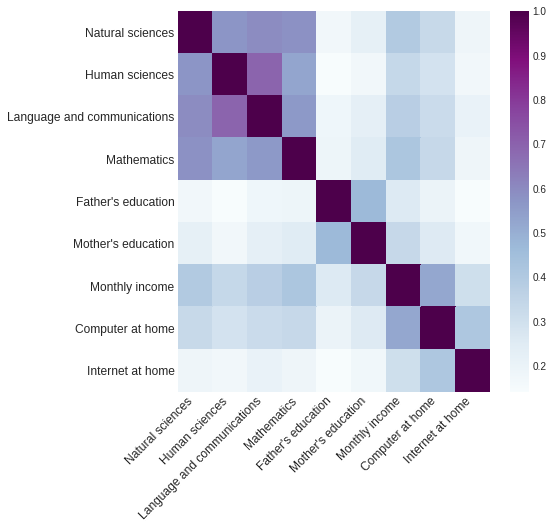

In [55]:
ax, fig = plt.subplots(figsize = (7, 7))

heatmap = sns.heatmap(social_corr, cmap = 'BuPu')

fig.set_yticklabels(heatmap.get_yticklabels(), fontsize = 12)
fig.set_xticklabels(heatmap.get_xticklabels(), rotation = 45, ha = "right", fontsize = 12)

plt.show()

In [56]:
## HIDE THE UPPER HALF OF THE TRIANGLE (remember that the correlation function is symmetric) ##

mask = np.zeros(social_corr.shape)

mask[np.triu_indices_from(mask)] = True

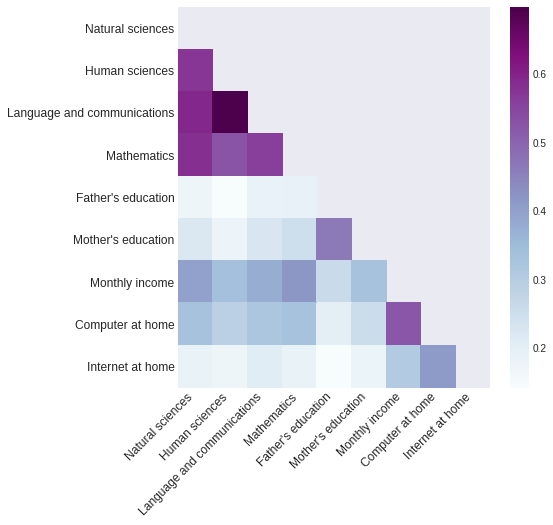

In [57]:
ax, fig = plt.subplots(figsize = (7, 7))

heatmap = sns.heatmap(social_corr, cmap = 'BuPu', mask = mask)

fig.set_yticklabels(heatmap.get_yticklabels(), fontsize = 12)
fig.set_xticklabels(heatmap.get_xticklabels(), rotation = 45, ha = "right", fontsize = 12)

plt.show()

By this last analysis, we conclude that the strongest correlation is between
the grades between the grades in *language and communication* and *human sciences*.
That is, generally those doing in one will also do good in the other. Among the grades,
the less correlated subjects are *mathematics* and human *sciences*. 

We observe that the level of education of the Mother is more strongly correlated
to the grades of the children than the father's education. There is also another
interesting strong correlation between the father's education and mother's education.
Maybe that means that people tend to group together with those which have similar
education than them. But that is out of our scope, but was interesting mentioning. 

Apart from the grades, the strongest correlation comes between the number of
*computer at home* and the grades. The number of computers at home is also
related to the *monthly income* of the family, which is also highly correlated
to the grades. That is also **probably** associated to those parents which can
give better education/pay better schools to their children. However, to confirm
that, we would need a missing information in the dataset related to the distribution
of people in the public and private schools.

# Predictive model

Choosing the features to be used and explaining them:
> The public high schools are under the governance of the state. Therefore, it is interesting
to keep the information about from which state the students are coming from (SG_UF_RESIDENCIA),

> The ae also seems relevant (NU_IDADE)

> The gender seems to not be significant by what we have checked so far, but we could include
that(TP_SEXO)

> Skin color (TP_COR_RACA)

> We are interested in those which, whether passing the exam, will be able to indeed enroll Uni.
Therefore we don't want those which are not able to do so. Let's then keep (TP_ST_CONCLUSAO) equal
to 1 or 2 (have already finished high school or were going to complete in that year).

> The kind of school they come from (TP_ST_CONCLUSAO)

> IN_TREINEIRO tells us if the person is taking with the intention to enroll uni (1) or not (0)

> TP_DEPENDENCIA_ADM_ESC contains the information about the kind fo school.

> TP_PRESENCA_CN, TP_PRESENCA_CH, TP_PRESENCA_LC, TP_PRESENCA_MT if != 0 corresponds that
the person were present for the test.

> 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT' correspond to the grade of the student
in the big areas.

> The essay grade is in NU_NOTA_REDACAO

> Q001 Father's education level

> Q002 Mother's education level

> Q007 If has housekeeper at home

> Q024 Computer at home

> Q025 Internet access

> Q027 School that have taken the high school


[['SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_ST_CONCLUSAO', 'TP_ESCOLA',
'IN_TREINEIRO', 'TP_DEPENDENCIA_ADM_ESC', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q007', 'Q024', 'Q025', 'Q027']]

In [89]:
df2018.iloc[:,85: ].head(10)

,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,0.00,nan,nan,nan,nan,nan,nan,nan,nan,NaN,...,A,A,A,A,A,A,A,A,B,A
1,1.00,449.00,451.00,455.00,462.00,521.00,568.70,513.10,480.30,ECEABBBDACBBBADEEDCBBCBCEBAACABEABECCEADEADCE,...,A,B,A,A,B,A,A,A,A,A
2,0.00,nan,nan,nan,nan,nan,nan,nan,nan,NaN,...,A,B,A,A,B,B,B,B,A,A
3,0.00,nan,nan,nan,nan,nan,nan,nan,nan,NaN,...,A,B,B,A,C,A,B,B,A,A
4,0.00,nan,454.00,457.00,nan,nan,419.90,345.80,nan,NaN,...,A,B,A,A,B,A,B,B,B,A
5,1.00,449.00,454.00,457.00,462.00,461.80,564.00,466.80,538.80,EEBCABEBAEBAAADEDDEBCADEDBABCDDADBEEACAAAADEE,...,A,B,A,A,B,A,B,B,A,A
6,0.00,nan,nan,nan,nan,nan,nan,nan,nan,NaN,...,A,C,A,A,B,A,B,B,A,A
7,1.00,448.00,453.00,458.00,460.00,499.30,663.20,605.20,733.80,ACBCEEDDDABABCECCBADABECBADDECBBEABBDDEADAADA,...,A,C,B,A,B,A,B,B,A,A
8,1.00,449.00,452.00,456.00,462.00,411.80,429.80,445.20,459.00,CEABDBDABDEBBDDECCBDECADEDBABDBBDEAABECCDEADB,...,A,B,B,A,B,A,A,A,B,A
9,1.00,449.00,454.00,457.00,462.00,469.40,650.20,606.60,525.40,AEEEBBBBEBDDBADABAEDBABDEBAADEAACAACAACDEABDA,...,A,B,A,A,B,A,A,A,A,A


In [79]:
df2018.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180008202043,2018,5300108,Brasília,53,DF,44.00,M,1.00,1,...,A,A,A,A,A,A,A,A,B,A
1,180007197856,2018,2111102,São João dos Patos,21,MA,23.00,F,0.00,3,...,A,B,A,A,B,A,A,A,A,A
2,180008517434,2018,3530607,Mogi das Cruzes,35,SP,23.00,F,0.00,1,...,A,B,A,A,B,B,B,B,A,A
3,180007661228,2018,2916401,Itapetinga,29,BA,26.00,F,0.00,3,...,A,B,B,A,C,A,B,B,A,A
4,180008787987,2018,2918100,Jeremoabo,29,BA,20.00,M,0.00,0,...,A,B,A,A,B,A,B,B,B,A


In [84]:
print(len(df2018[['TP_DEPENDENCIA_ADM_ESC']]))
print(len(df2018[['TP_DEPENDENCIA_ADM_ESC']].dropna()))

100000
19956
